In [8]:
import numpy as np
import centpy.centpy
from centpy import *
# Setup up visualization
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.dpi']  = 60
import matplotlib.pyplot as plt
from matplotlib import animation

j0 = slice(2, -2)

We solve the nonlinear scalar conservation law 

\begin{equation}
\partial_t u + \partial_x \sin u + \frac{1}{3} \partial_y u^3= 0,
\end{equation}

on the domain $(x,y,t)\in([0,2\pi]\times[0,2\pi]\times[0,6])$ with initial data

\begin{equation}
u(x,y,0) = \sin \left(x+\frac{1}{2}\right) \cos(2x+y)
\end{equation}

and periodic boundary conditions. The solution is computed using a 144 $\times$ 144 mesh and CFL number 0.9.

In [9]:
pars = centpy.Pars2d(
    x_init=0.0,
    x_final=2.0 * np.pi,
    y_init=0.0,
    y_final=2.0 * np.pi,
    J=144,
    K=144,
    t_final=6.0,
    dt_out=0.1,
    cfl=0.9,
    scheme="sd3",
)

In [11]:
class Scalar2d(centpy.Equation2d):
    def initial_data(self):
        return np.sin(self.xx.T + 0.5) * np.cos(2 * self.xx.T + self.yy.T)

    def boundary_conditions(self, u):
        # x-boundary
        u[0] = u[-4]
        u[1] = u[-3]
        u[-2] = u[2]
        u[-1] = u[3]
        # y-boundary
        u[:, 0] = u[:, -4]
        u[:, 1] = u[:, -3]
        u[:, -2] = u[:, 2]
        u[:, -1] = u[:, 3]

    def flux_x(self, u):
        return np.sin(u)

    def flux_y(self, u):
        return 1.0 / 3.0 * u ** 3

    def spectral_radius_x(self, u):
        return np.abs(np.cos(u))

    def spectral_radius_y(self, u):
        return u**2

In [12]:
eqn = Scalar2d(pars)
soln = centpy.Solver2d(eqn)
soln.solve()

<IPython.core.display.Javascript object>


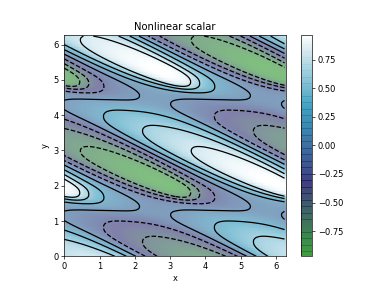

In [13]:
# Animation
x_init = soln.x_init
x_final = soln.x_final
y_init = soln.y_init
y_final = soln.y_final
x = soln.x
y = soln.y
u_n = soln.u_n
Nt = soln.Nt

fig = plt.figure()
ax = plt.axes(xlim=(x_init,x_final), ylim=(y_init, y_final))

ax.set_title("Nonlinear scalar")
ax.set_xlabel("x")
ax.set_ylabel("y")

contours=ax.contour(x[j0], y[j0], u_n[0,j0,j0], 8, colors='black') 
img=ax.imshow(u_n[0,j0,j0], extent=[0, 6.3, 0, 6.3], origin='lower',
           cmap='ocean', alpha=0.5)
#cl=ax.clabel(contours, inline=True, fontsize=8)

fig.colorbar(img)
plt.axis(aspect='image')
def animate(i):
    ax.collections = []
    ax.contour(x[j0], y[j0], u_n[i,j0,j0], 8, colors='black') 
#    cl=ax.clabel(contours, inline=True, fontsize=8)
    img.set_array(u_n[i,j0,j0])
    img.autoscale()
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=100, blit=False)
 
plt.show()